In [72]:
pd.set_option('display.height', 1000) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)

height has been deprecated.



In [121]:
raw_data = pd.read_table("amazon_cells_labelled.txt", header=None)

### Data
Data was acuired from the UCI Machine Learning Repository and contains sentences taken from Amazon reviews that are labeled as having either a positive(1) or negative(0) sentenment.  There are 1000 rows of data.  Data from IMDB reviews was also acquired from the same source to use for testing.

link : https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#

In [104]:
# See number of rows in dataset.
len(raw_data)

1000

In [116]:
data = []

In [122]:
raw_data

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [123]:
# Create working copy of data
data = raw_data

In [124]:
data.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [125]:
# Rename columns
data.columns=["sentence","sentiment"]

In [157]:
# Create dataframes with separated positive and negeative data.
positive = data.loc[data["sentiment"]== 1]
negative = data.loc[data["sentiment"]== 0]

#### Create Features

In order to create features I will look at which words are used most frequently in positive reviews.  As I look through the wordds I will decide which ones seem to be most likely associated with positive reviews, as opposed to used that are ambigious in their sentiment. 

In [156]:
# Create empty dataframe
count = pd.DataFrame()

# See count of how frequently words are used

count = positive.sentence.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
count = count.sort_values()
count[1450:]

found            6.0
wear             6.0
My               6.0
good.            6.0
device           6.0
use.             6.0
used             6.0
case.            6.0
Jabra            6.0
years            6.0
fine             6.0
does             6.0
people           6.0
bluetooth        6.0
much             6.0
purchase.        6.0
It's             7.0
about            7.0
excellent        7.0
camera           7.0
when             7.0
case             7.0
without          7.0
lot              7.0
car              7.0
worked           7.0
quality.         7.0
highly           7.0
reception        8.0
at               8.0
2                8.0
get              8.0
cell             8.0
Battery          8.0
also             8.0
bought           8.0
pretty           8.0
it's             8.0
or               8.0
better           8.0
new              8.0
work             8.0
because          8.0
an               9.0
price.           9.0
these            9.0
comfortable      9.0
no           

In [128]:
keywords = ["Best","best","good","great", "Great", "works","Works","loved","Loved","quality","Quality","recommend","Recommend","very","Very","Good","love","Love","easy","Easy","happy","Happy","Excellent","excellent","great.","Great."]

for key in keywords:
    data[str(key)] = data.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [129]:
# Convert sentiment column to boolean for modeling.
data["sentiment"] = (data["sentiment"] == 1)

In [130]:
# View of final table with keywords
data

,sentence,sentiment,Best,best,good,great,Great,works,Works,loved,Loved,quality,Quality,recommend,Recommend,very,Very,Good,love,Love,easy,Easy,happy,Happy,Excellent,excellent,great.,Great.
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


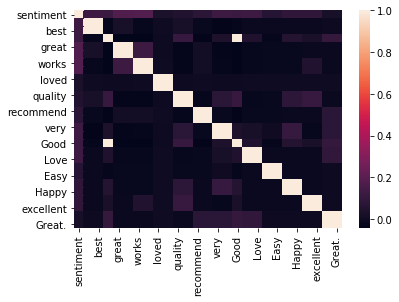

In [136]:
# Heatmap to see correlation between keywords
sns.heatmap(data.corr())

In [132]:
# Create inputs for model
analysis_data = data[keywords]
target = data["sentiment"]

In [133]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(analysis_data,target)
y_pred= bnb.predict(analysis_data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 334


In [134]:
# Run Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
bnb = GaussianNB()
bnb.fit(analysis_data,target)
y_pred= bnb.predict(analysis_data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 387


In [153]:
# Run IMDB data through model

raw_data_test = pd.read_table("imdb_labelled.txt", header=None)
data_test = raw_data_test
data_test.columns=["sentence","sentiment"]

for key in keywords:
    data_test[str(key)] = data_test.sentence.str.contains(' ' + str(key) + ' ',case=False)
positive_test = data_test.loc[data_test["sentiment"]== 1]
data_test["sentiment"] = (data_test["sentiment"] == 1)
analysis_data_test = data_test[keywords]
target_test = data_test["sentiment"]
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(analysis_data_test,target_test)
y_pred= bnb.predict(analysis_data_test)
print("Number of mislabeled points out of a total {} points : {}".format(
    data_test.shape[0],
    (target_test != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 328


In [139]:
# See count of how frequently words are used

count_test = positive_test.sentence.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
count = count.sort_values()
count[100:]

NOTHING!I           1.0
Jawbone             1.0
Restored            1.0
Jabra350            1.0
Cheap               1.0
back                1.0
bars                1.0
bargain..           1.0
Christmas           1.0
bargain.            1.0
bargain!            1.0
barely              1.0
bar                 1.0
China               1.0
Authentic           1.0
Will                1.0
Was                 1.0
Plan                1.0
Plantronics.        1.0
Plus,               1.0
Pocket              1.0
Reversible          1.0
S11.                1.0
Quality.            1.0
QWERTY              1.0
Q,                  1.0
Protects            1.0
Cell.               1.0
Pros:-Good          1.0
Print               1.0
Price               1.0
Krussel             1.0
Premium             1.0
Portable            1.0
LG                  1.0
Product.            1.0
alarm               1.0
Era                 1.0
all!.               1.0
smoother.           1.0
done                1.0
shipment        